In [5]:
# Import libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
data = pd.read_csv('hotel_bookings.csv')
print(data.head())
#summary of the DS
print(data.info())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [8]:
# missing values
# childeren
data['children'] = data['children'].fillna(data['children'].median())
# country
data['country'] = data['country'].fillna(data['country'].mode()[0])
# agent and company 
data['agent'] = data['agent'].fillna(0)
data['company'] = data['company'].fillna(0)
# make sure no more missings 
missing_values_after = data.isnull().sum()
print(missing_values_after[missing_values_after > 0])


####
#For children, it uses the median value to fill missing entries.
#For country, it uses the most frequent value (mode).
#For agent and company, missing values are filled with 0, assuming 0 indicates no agent or company.
###




Series([], dtype: int64)


In [9]:
# Duplicates

duplicate_rows = data.duplicated().sum()
print(f'Duplicates in the dataset: {duplicate_rows}')

# Drop duplicates
data = data.drop_duplicates()

# make sur no more duplicates
duplicate_rows_after = data.duplicated().sum()
print(f'Duplicates after cleaning: {duplicate_rows_after}')


Duplicates in the dataset: 32013
Duplicates after cleaning: 0


In [10]:
# Save clean dataset
data.to_csv('cleaned_hotel_bookings.csv', index=False)


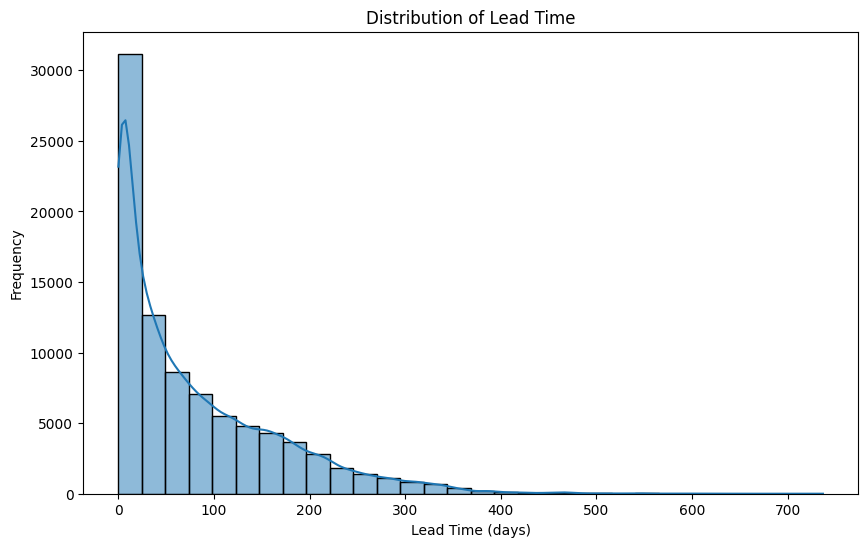

In [11]:
# Distribution of lead time
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


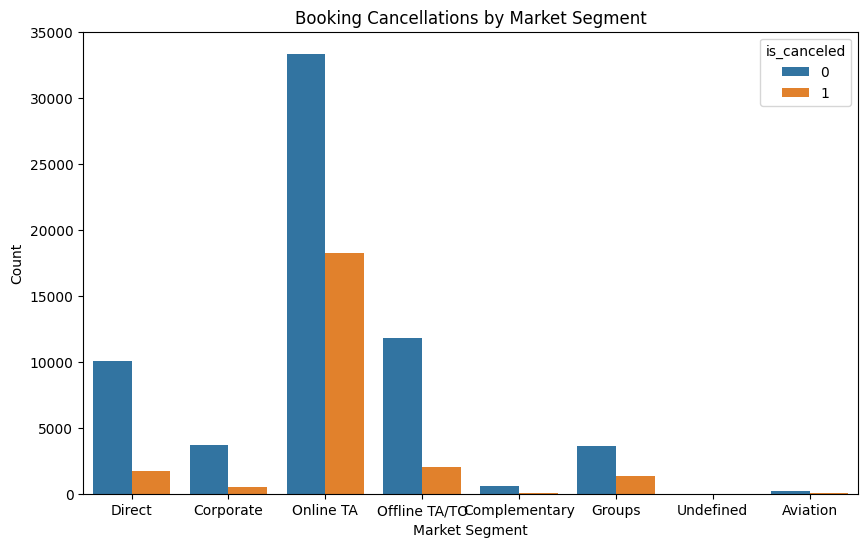

In [12]:
# Booking cancellations by market segment
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='market_segment', hue='is_canceled')
plt.title('Booking Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()


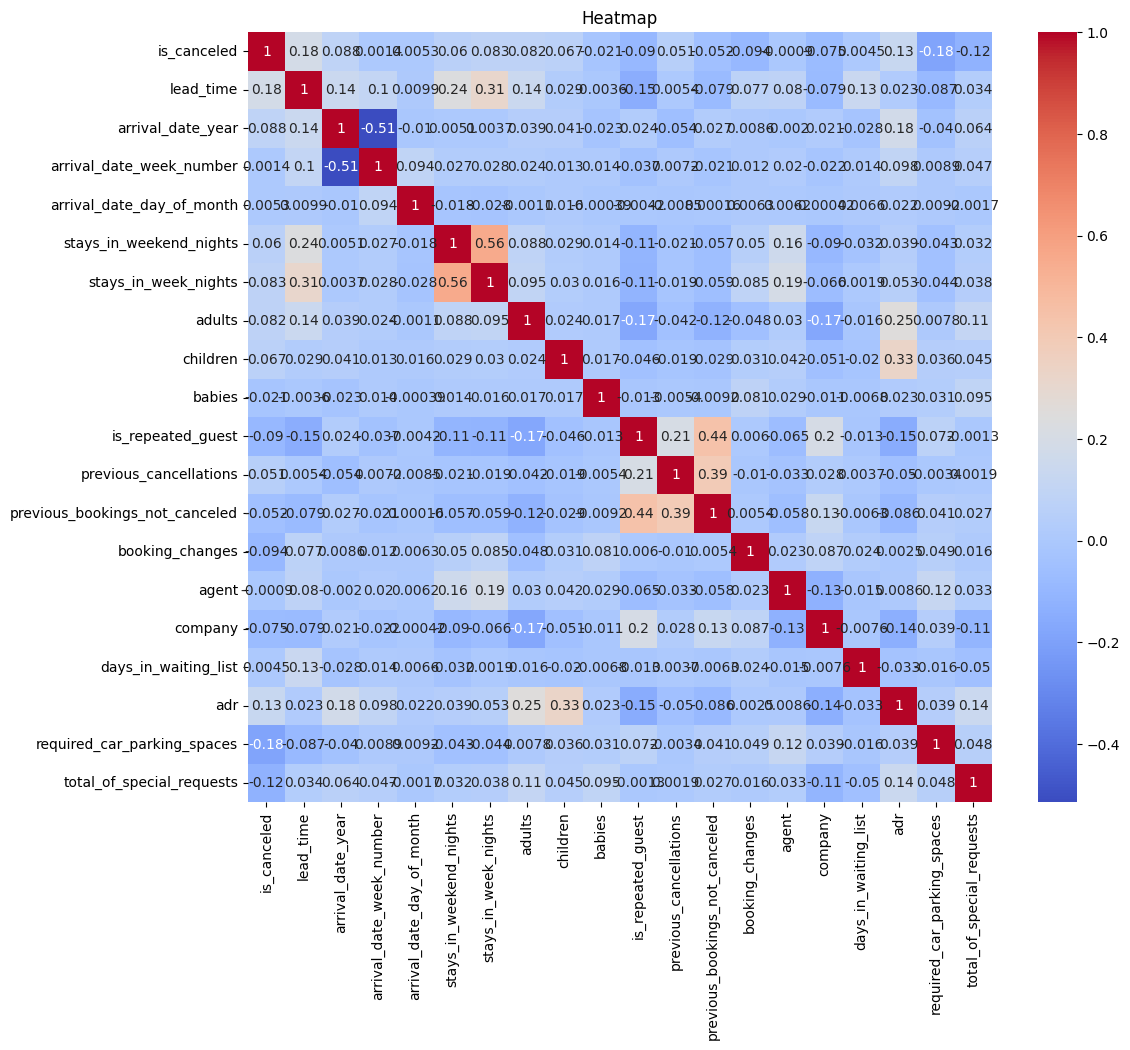

In [14]:
#heatmap
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()


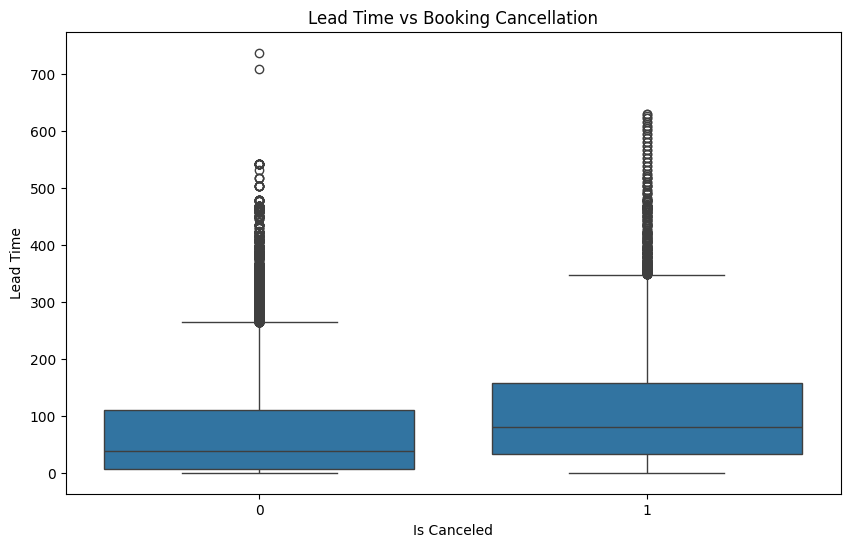

In [15]:
# Analyze booking cancellations by lead time
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='is_canceled', y='lead_time')
plt.title('Lead Time vs Booking Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time')
plt.show()


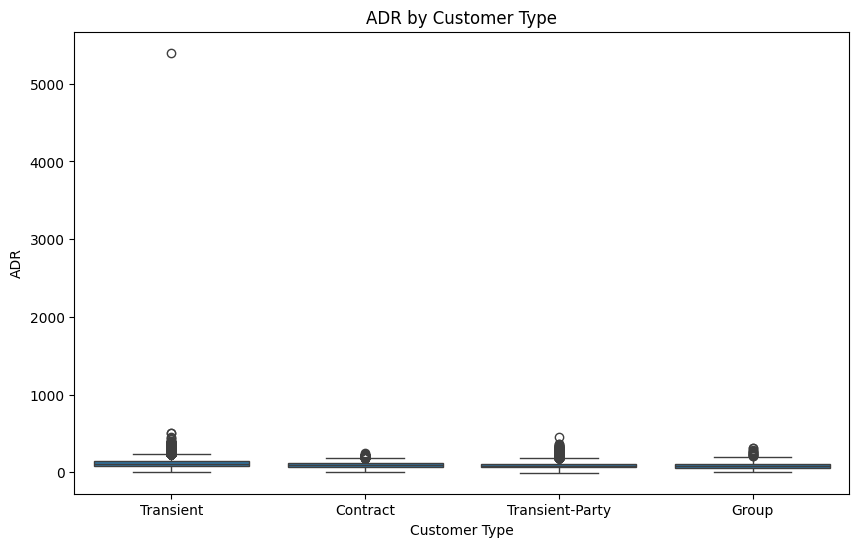

In [16]:
# Analyze  Average Daily Rate by customer type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='customer_type', y='adr')
plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.show()


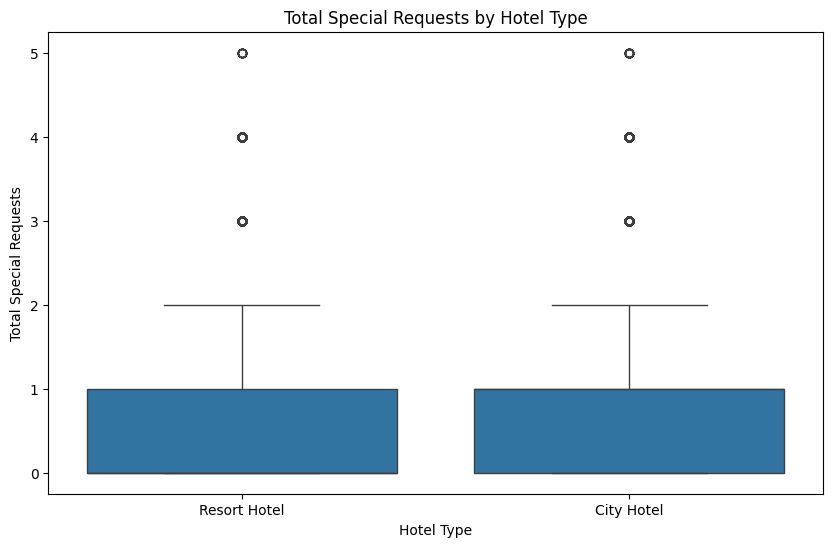

In [17]:
# Analyze total number of special requests by hotel type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='hotel', y='total_of_special_requests')
plt.title('Total Special Requests by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Special Requests')
plt.show()


In [18]:
# Summary 
print(f"""
Summary and Conclusion:
1. The original dataset had 119,390 rows and 32 columns. After cleaning, it now has {data.shape[0]} rows.
2. Ihandled missing values in 'children', 'country', 'agent', and 'company' columns.
3. I found and removed duplicate rows.
4. informations found from my analysis include:
   - Most bookings are made shortly before the check-in date.
   - Some market segments have higher cancellation rates than others.
   - There are important relationships between different numbers in the data.
   - Bookings made a long time in advance are more likely to be canceled.
   - Different types of customers spend different amounts of money.
   - Guests at different types of hotels make different numbers of special requests.
""")



Summary and Conclusion:
1. The original dataset had 119,390 rows and 32 columns. After cleaning, it now has 87377 rows.
2. Ihandled missing values in 'children', 'country', 'agent', and 'company' columns.
3. I found and removed duplicate rows.
4. informations found from my analysis include:
   - Most bookings are made shortly before the check-in date.
   - Some market segments have higher cancellation rates than others.
   - There are important relationships between different numbers in the data.
   - Bookings made a long time in advance are more likely to be canceled.
   - Different types of customers spend different amounts of money.
   - Guests at different types of hotels make different numbers of special requests.

